<h1 align="center"><strong>Projet Data Science</h1> <h2 align="center">Livrable 3 : Captionning d'images</strong></h2> <h3 align="center">Modèle connu pré-entrainé</strong></h3> 

# Importation des bibliothèques et chargement du modèle

Dans cette section, nous importons les bibliothèques nécessaires et chargeons le modèle pré-entraîné pour le captioning d'images.

1. **Importation des bibliothèques** :
   - `requests` : pour effectuer des requêtes HTTP (non utilisé dans ce code, mais potentiellement utile pour charger des images depuis le web)
   - `PIL` (Python Imaging Library) : pour manipuler les images
   - `transformers` : pour utiliser le modèle BLIP de Salesforce

2. **Chargement du modèle** :
   - Nous utilisons le modèle "Salesforce/blip-image-captioning-large" de la bibliothèque Hugging Face Transformers
   - Le processeur BLIP est chargé pour préparer les entrées du modèle
   - Le modèle BLIP pour la génération conditionnelle est chargé

Ce modèle BLIP (Bootstrapping Language-Image Pre-training) est conçu pour générer des légendes d'images de haute qualité. Il a été pré-entraîné sur un large ensemble de données d'images et de textes, ce qui lui permet de comprendre le contenu des images et de générer des descriptions pertinentes.

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Charger le processeur et le modèle
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Information sur le BLIP

BLIP (Bootstrapping Language-Image Pre-training) est un modèle multimodal développé par Salesforce Research pour améliorer la compréhension et la génération de contenu visuel et textuel.

## Architecture

BLIP utilise une architecture de type encodeur-décodeur :

1. **Encodeur d'image** : Basé sur ViT (Vision Transformer)
2. **Encodeur de texte** : Basé sur BERT
3. **Décodeur** : Similaire à GPT

## Pré-entraînement

BLIP utilise trois tâches principales pour son pré-entraînement :

1. **Captioning d'image** (IC)
2. **Récupération d'image** (IR)
3. **Récupération de texte** (TR)

### Fonction de perte

La fonction de perte globale est une combinaison de ces trois tâches :

$$\mathcal{L} = \lambda_{IC} \mathcal{L}_{IC} + \lambda_{IR} \mathcal{L}_{IR} + \lambda_{TR} \mathcal{L}_{TR}$$

où $\lambda_{IC}$, $\lambda_{IR}$, et $\lambda_{TR}$ sont des hyperparamètres pondérant l'importance de chaque tâche.

## Captioning d'image

Pour le captioning d'image, BLIP utilise une approche de génération conditionnelle. La probabilité de générer une légende $y$ étant donné une image $x$ est modélisée comme :

$$P(y|x) = \prod_{t=1}^T P(y_t|y_{<t}, x)$$

où $y_t$ est le t-ème token de la légende, et $y_{<t}$ représente tous les tokens précédents.

## Récupération d'image et de texte

Pour la récupération d'image et de texte, BLIP utilise une fonction de similarité cosinus normalisée :

$$s(x, y) = \frac{f(x)^T g(y)}{\|f(x)\| \|g(y)\|}$$

où $f(x)$ et $g(y)$ sont les représentations de l'image et du texte respectivement.

## Bootstrapping

BLIP introduit une technique de "bootstrapping" pour améliorer la qualité des paires image-texte :

1. **Filtrage** : Élimination des légendes de faible qualité
2. **Synthèse** : Génération de nouvelles légendes pour les images

La probabilité de conserver une légende est donnée par :

$$P(keep|x, y) = \sigma(w^T[f(x); g(y); f(x) \odot g(y)])$$

où $\sigma$ est la fonction sigmoïde, $w$ est un vecteur de poids appris, et $\odot$ représente le produit élément par élément.

## Avantages de BLIP

1. **Flexibilité** : Peut être utilisé pour diverses tâches multimodales
2. **Qualité des légendes** : Produit des descriptions d'images plus précises et naturelles
3. **Efficacité** : Utilise efficacement les données d'entraînement grâce au bootstrapping

## Représentation visuelle de l'architecture BLIP

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1400/0*YNeU__7bEV4i_2_z)

## Conclusion

BLIP représente une avancée significative dans le domaine de l'apprentissage multimodal, offrant des performances état de l'art sur diverses tâches de vision par ordinateur et de traitement du langage naturel.


# Chargement et traitement de l'image

Dans cette section, nous chargeons une image locale et utilisons le modèle BLIP pour générer des légendes conditionnelles et non conditionnelles.

1. **Chargement de l'image** :
   - L'image est chargée à partir d'un fichier local et convertie en mode RGB.

2. **Génération de légende conditionnelle** :
   - Nous utilisons un texte d'amorce "a photography of" pour guider la génération.
   - L'image et le texte sont traités par le processeur BLIP.
   - Le modèle génère une légende basée sur ces entrées.
   - L'image est affichée et la légende conditionnelle est imprimée.

3. **Génération de légende non conditionnelle** :
   - Seule l'image est traitée par le processeur BLIP, sans texte d'amorce.
   - Le modèle génère une légende basée uniquement sur l'image.
   - La légende non conditionnelle est imprimée.

Cette approche nous permet de comparer les résultats de la génération de légendes avec et sans contrainte textuelle, démontrant la flexibilité du modèle BLIP dans différents scénarios de captioning d'images.

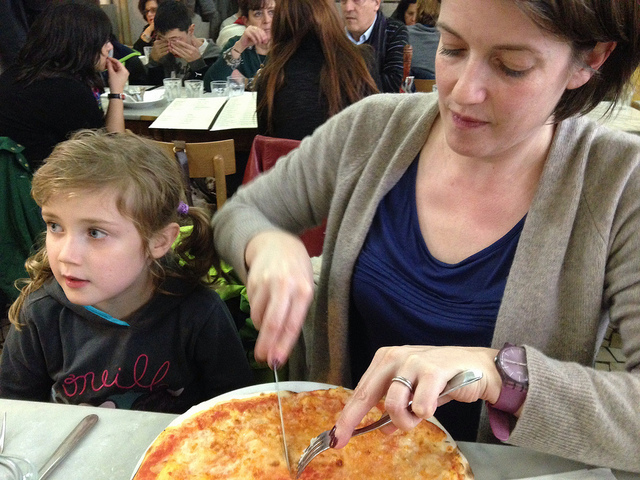

Conditional caption: a photography of a woman cutting a pizza with a knife and fork
Unconditional caption: woman cutting a pizza with a knife and fork with a child


In [3]:
#Charger l'image depuis le fichier local
image_path = 'train2014/COCO_train2014_000000000110.jpg'
raw_image = Image.open(image_path).convert('RGB')


# Conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
display(raw_image)
print("Conditional caption:", processor.decode(out[0], skip_special_tokens=True))

# Unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print("Unconditional caption:", processor.decode(out[0], skip_special_tokens=True))
